<a href="https://colab.research.google.com/github/s14990/prbd/blob/main/PRBD_pd4165.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Przygotowanie sródowiska i ładowanie danych

In [107]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import lasso_path
!pip install shap -qq

import xgboost
import shap
from nltk.corpus import stopwords
!pip install gdown -qq
!pip install feature-engine
import gdown
!sudo apt-get install p7zip-full p7zip-rar -qq

url = 'https://drive.google.com/uc?id=16w28KbIhHkUXQ54DtyE2eQFQBR5kYfPd'
output = "listings_den.csv.gz"
gdown.download(url, output)
df = pd.read_csv('listings_den.csv.gz', compression='gzip')
pd.set_option('display.max_columns', None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading...
From: https://drive.google.com/uc?id=16w28KbIhHkUXQ54DtyE2eQFQBR5kYfPd
To: /content/listings_den.csv.gz
100%|██████████| 4.28M/4.28M [00:00<00:00, 197MB/s]


In [108]:
df = pd.read_csv('listings_den.csv.gz', compression='gzip')

# 2. Dane zawierają 5362 wierszy oraz 74 zmiennych

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5362 entries, 0 to 5361
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5362 non-null   int64  
 1   listing_url                                   5362 non-null   object 
 2   scrape_id                                     5362 non-null   int64  
 3   last_scraped                                  5362 non-null   object 
 4   source                                        5362 non-null   object 
 5   name                                          5362 non-null   object 
 6   description                                   5341 non-null   object 
 7   neighborhood_overview                         3860 non-null   object 
 8   picture_url                                   5362 non-null   object 
 9   host_id                                       5362 non-null   i

3. Próbka Danych

In [110]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,177,https://www.airbnb.com/rooms/177,20230331030733,2023-03-31,city scrape,Tiny Home in the Heart of the City- ECO FRIENDLY,"160 sq ft + 80 sq ft loft for sleeping, Sleeps...","Quiet neighborhood next to park, creeks and bi...",https://a0.muscache.com/pictures/a1745ab2-b3a0...,615,https://www.airbnb.com/users/show/615,Joe,2008-07-07,"Denver, CO","I'm originally from Oklahoma, but have lived i...",within a day,100%,100%,t,https://a0.muscache.com/im/pictures/user/905d6...,https://a0.muscache.com/im/pictures/user/905d6...,Virginia Village,2,2,"['email', 'phone']",t,f,"Denver, Colorado, United States",Virginia Village,NaN,39.69551,-104.92489,Entire guesthouse,Entire home/apt,2,NaN,1 bath,NaN,1.00000,"[""Dishes and silverware"", ""Coffee maker"", ""Ess...",$79.00,29,400,29,29,400,400,29.00000,400.00000,NaN,t,29,59,89,364,2023-03-31,120,19,0,2016-09-04,2022-07-30,4.85000,4.96000,4.89000,4.97000,4.94000,4.85000,4.78000,2016-BFN-0004968,f,2,2,0,0,1.50000
1,1223612,https://www.airbnb.com/rooms/1223612,20230331030733,2023-03-31,city scrape,Suite of rooms in Capitol Hill,I have a suite of rooms in a Victorian house i...,The house is located in the heart of Capitol H...,https://a0.muscache.com/pictures/18414184/eafb...,6674631,https://www.airbnb.com/users/show/6674631,Cynthia,2013-05-31,"Denver, CO",I'm from the Black Hills of South Dakota so I ...,within a few hours,100%,70%,t,https://a0.muscache.com/im/users/6674631/profi...,https://a0.muscache.com/im/users/6674631/profi...,Cheesman Park,3,3,"['email', 'phone']",t,f,"Denver, Colorado, United States",Cheesman Park,NaN,39.73165,-104.97057,Private room in home,Private room,3,NaN,1 bath,1.00000,2.00000,"[""Hot water"", ""Iron"", ""Essentials"", ""Heating"",...",$58.00,29,1125,29,29,1125,1125,29.00000,1125.00000,NaN,t,0,30,60,335,2023-03-31,184,1,0,2013-06-17,2022-11-04,4.71000,4.73000,4.55000,4.91000,4.87000,4.85000,4.76000,NaN,f,3,0,3,0,1.54000
2,1313699,https://www.airbnb.com/rooms/1313699,20230331030733,2023-03-31,previous scrape,"Platt Park Urban Getaway: entire house, families!","Beautiful 3-story Bungalow in Platt Park, 5 bl...",The Platt Park neighborhood is one of the most...,https://a0.muscache.com/pictures/2c32d4c7-8cbd...,7138728,https://www.airbnb.com/users/show/7138728,Ann,2013-06-26,"Denver, CO",My husband and I are from Michigan but have be...,NaN,NaN,83%,f,https://a0.muscache.com/im/users/7138728/profi...,https://a0.muscache.com/im/users/7138728/profi...,NaN,1,2,"['email', 'phone']",t,t,"Denver, Colorado, United States",Platt Park,NaN,39.68332,-104.97382,Entire home,Entire home/apt,10,NaN,2 baths,5.00000,5.00000,"[""Dishes and silverware"", ""Dryer"", ""Essentials...",$218.

# 4.Weryfikacja typów

do usunięcia są listing_url,scrape_id,last_scraped,picture_url,license.
Te kolumnę nie można zaklasyfikować, mają unikalne wartości lub moją powyrzej 30% brakujących wartości
listing_url,scrape_id,last_scraped,picture_url,license,host_url,'host_thumbnail_url','host_picture_url'neighbourhood_group_cleansed,calendar_last_scraped,license

to cat: source,host_location, host_response_time, host_neighbourhood, host_verifications, neighbourhood (fill), neighbourhood_cleansed
property_type, room_type


other name , last_review first_review

to float: host_acceptance_rate (fill) host_response_rate (fill), price

to boolean (fill false),host_has_profile_pic,host_identity_verified, has_availabilit,instant_bookable

In [111]:
df.drop(['listing_url','last_scraped','picture_url','license','host_url','host_thumbnail_url','host_picture_url','calendar_last_scraped','license','name','description','host_name', 'neighborhood_overview',
         'host_about','neighbourhood_group_cleansed', 'id', 'scrape_id', 'host_id', 'calendar_updated'], axis='columns', inplace=True)
#df.drop(['calendar_updated'], axis='columns', inplace=True)

Transformacja to float: host_acceptance_rate, host_response_rate, price

In [112]:
df.price = df.price.apply(lambda x: x.replace("$", ""))
df.price = df.price.apply(lambda x: x.replace(",", ""))
df.price = df.price.astype("float")

In [113]:
df.host_acceptance_rate = df.host_acceptance_rate.apply(lambda x: x.replace("%", "") if type(x) == str else None)
df.host_acceptance_rate = df.host_acceptance_rate.astype("float")/100

In [114]:
df.host_response_rate = df.host_response_rate.apply(lambda x: x.replace("%", "") if type(x) == str else None)
df.host_response_rate = df.host_response_rate.astype("float")/100

Transformacja boolean: host_has_profile_pic,host_identity_verified, has_availabilit,instant_bookable

In [115]:
df.host_has_profile_pic = df.host_has_profile_pic.map({'t': True, 'f': False})
df.host_identity_verified = df.host_identity_verified.map({'t': True, 'f': False})
df.has_availability = df.has_availability.map({'t': True, 'f': False})
df.instant_bookable = df.instant_bookable.map({'t': True, 'f': False})
df.host_is_superhost.fillna('f')
df.host_is_superhost = df.host_is_superhost.map({'t': True, 'f': False})

df.host_identity_verified = df.host_identity_verified.astype("bool")
df.has_availability = df.has_availability.astype("bool")
df.host_has_profile_pic = df.host_has_profile_pic.astype("bool")
df.host_is_superhost = df.host_is_superhost.astype("bool")
df.instant_bookable = df.instant_bookable.astype("bool")

Tranformacja bathroom

In [116]:
df['bathrooms'] = np.where(df['bathrooms_text'].str.contains('half', na=False, case=False), 0.5, df['bathrooms_text'].str.split().str[0]).astype(np.float64)
df.drop(['bathrooms_text'], axis='columns', inplace=True)

Transformacja amenities

In [117]:
df['amenities'] = df['amenities'].apply(lambda x: len(x.split(',')))

To date last_review,first_review

In [118]:
df.last_review = pd.to_datetime(df.last_review, errors='coerce')
df.first_review = pd.to_datetime(df.first_review, errors='coerce')
df.host_since = pd.to_datetime(df.host_since, errors='coerce')

to cat: source,host_location, host_response_time, host_neighbourhood, host_verifications, neighbourhood (fill), neighbourhood_cleansed
property_type, room_type

In [119]:
cols_to_cat = ['source', 'host_location', 'host_response_time', 'host_neighbourhood', 'host_verifications', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type']
for col in cols_to_cat:
        df[col] = df[col].astype('category')


# 5. Opis zmiennych

In [120]:
df_numbers = df.select_dtypes(include=['int','float']).describe()
df_numbers.loc['missing'] = df.isnull().sum()
df_numbers.loc['median'] = df.median()
df_numbers


DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4686.00000,4925.00000,5362.00000,5362.00000,5362.00000,5362.00000,5362.00000,5357.00000,5076.00000,5320.00000,5362.00000,5362.00000,5362.00000,5362.00000,5362.00000,5362.00000,5362.00000,5362.00000,5362.00000,5362.00000,5362.00000,5362.00000,5362.00000,5362.00000,5362.00000,5362.00000,5362.00000,4402.00000,4398.00000,4398.00000,4398.00000,4398.00000,4398.00000,4398.00000,5362.00000,5362.00000,5362.00000,5362.00000,4402.00000
mean,0.97730,0.92552,314.10201,397.96195,39.74154,-104.97773,4.10127,1.49673,1.81422,2.19192,40.95039,171.32749,16.69358,553.22137,19.87747,32.89724,401309.92074,401324.89966,32.09164,401318.91091,10.91720,25.84166,41.11992,172.99590,51.31593,14.41701,1.01250,4.82420,4.85918,4.82729,4.89999,4.89295,4.84491,4.75554,19.76688,18.95412,0.72268,0.05688,1.97803
std,0.09281,0.16729,1099.43090,1361.76637,0.03140,0.05892,2.59086,0.85296,1.02902,1.55268,16.13309,314.34868,23.17266,475.51216,41.56073,77.36850,29326909.35763,29326909.15288,75.29630,29326909.23471,10.93242,21.36530,31.44332,124.84346,94.52402,22.89560,1.86697,0.39714,0.34760,0.36073,0.31234,0.34258,0.31714,0.39417,54.95956,55.12573,2.78579,0.70937,2.06604
min,0.00000,0.00000,1.00000,1.00000,39.61554,-105.09596,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,2.00000,1.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.01000
25%,1.00000,0.94000,1.00000,1.00000,39.72659,-105.01709,2.00000,1.00000,1.00000,1.00000,29.00000,87.00000,2.00000,60.00000,2.00000,2.00000,365.00000,365.00000,2.00000,365.00000,0.00000,1.00000,8.00000,58.00000,1.00000,0.00000,0.00000,4.81000,4.86000,4.80000,4.92000,4.91000,4.83000,4.71000,1.00000,1.00000,0.00000,0.00000,0.39000
50%,1.00000,0.99000,2.00000,3.00000,39.74813,-104.98573,4.00000,1.00000,2.00000,2.00000,40.00000,122.00000,4.00000,365.00000,4.00000,5.00000,1125.00000,1125.00000,4.85000,1125.00000,8.00000,26.00000,42.00000,165.00000,12.00000,4.00000,0.00000,4.93000,4.95000,4.93000,4.98000,4.99000,4.93000,4.85000,1.00000,1.00000,0.00000,0.00000,1.33000
75%,1.00000,1.00000,9.00000,13.00000,39.76199,-104.96059,5.00000,2.00000,2.00000,3.00000,53.00000,183.00000,30.00000,1125.00000,30.00000,30.00000,1125.00000,1125.00000,30.00000,1125.00000,20.00000,45.00000,68.00000,292.00000,57.00000,21.00000,1.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,4.95000,6.00000,3.00000,0.00000,0.00000,2.95000
max,1.00000,1.00000,4818.00000,7847.00000,39.81838,-104.73494,16.00000,17.00000,9.00000,18.00000,99.00000,9999.00000,600.00000,1125.00000,600.00000,600.00000,2147483647.00000,2147483647.00000,600.00000,2147483647.00000,30.00000,60.00000,90.00000,365.00000,1367.00000,385.00000,21.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,253.00000,253.00000,26.00000,10.00000,32.77000
missing,676.00000,437.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5.00000,286.00000,42.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,960.00000,964.00000,964.00000,964.00000,964.00000,964.00000,964.00000,0.00000,0.00000,0.00

In [121]:
df_cat = df.select_dtypes(include=['category']).describe()
df_cat.loc['missing'] = df.isnull().sum()
df_cat

,source,host_location,host_response_time,host_neighbourhood,host_verifications,neighbourhood,neighbourhood_cleansed,property_type,room_type
count,5362,4609,4686,5072,5362,3860,5362,5362,5362
unique,2,166,4,184,5,14,78,42,4
top,city scrape,"Denver, CO",within an hour,Five Points,"['email', 'phone']","Denver, Colorado, United States",Five Points,Entire home,Entire home/apt
freq,4658,3724,3886,320,3924,3827,438,1432,4547
missing,0,753,676,290,0,1502,0,0,0


# 6. Analiza

W następujących kolumnach brakuje takiej samej ilości wartości, więc można wywnioskować, że w 20% sprawdzam brakuję oceny:

review_scores_rating	review_scores_accuracy	review_scores_cleanliness	review_scores_checkin	review_scores_communication	review_scores_location	review_scores_value

Koumny host_response_rate	host_acceptance_rate,host_location	host_response_time	host_neighbourhood do zbadania w następnym kroku.

neighbourhood	brakuje powyżej 30% wartości, więc tez jest do usunięcia.

In [122]:
df.drop(['neighbourhood'], axis='columns', inplace=True)

# 7. Wizualizacja

<Axes: >

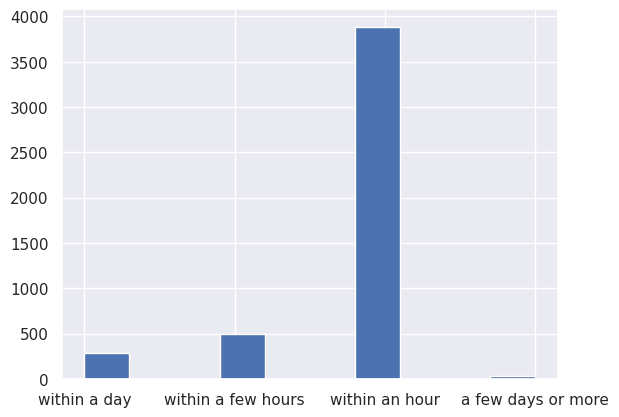

In [123]:
df.host_response_time.hist()

<Axes: >

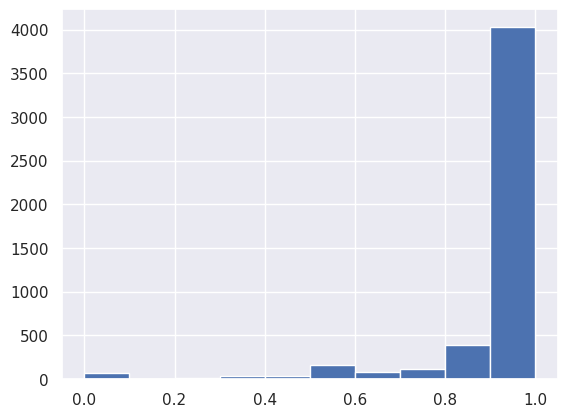

In [124]:
df.host_acceptance_rate.hist()

Kolumny host_response_time,host_acceptance_rate,host_response_rate są zdominowana przez jedną wartość, więc można użyć mediany dla uzupełnienia danych.

In [125]:
df['host_neighbourhood'].unique()

['Virginia Village', 'Cheesman Park', NaN, 'Capitol Hill', 'West Colfax', ..., 'Auraria', 'Biltmore Beach', 'La Grande Princesse', 'Shadow Mountain', 'Batignolles']
Length: 185
Categories (184, object): ['Alamo Placita', 'Allendale Area', 'Anaheim', 'Anatolia Village', ...,
                           'White River Junction', 'Whittier', 'Willow Park', 'Windsor']

In [126]:
df['neighbourhood_cleansed'].unique()

['Virginia Village', 'Cheesman Park', 'Platt Park', 'Capitol Hill', 'West Colfax', ..., 'Kennedy', 'Auraria', 'Elyria Swansea', 'Southmoor Park', 'Marston']
Length: 78
Categories (78, object): ['Athmar Park', 'Auraria', 'Baker', 'Barnum', ..., 'West Highland', 'Westwood',
                          'Whittier', 'Windsor']

host_neighbourhood jest podobna do neighbourhood_cleansed, więc warto uzyć uzupełniee na podstawie tej kolumny. host_location tez prawdopodobnie zależy od host_neighbourhood



<Axes: >

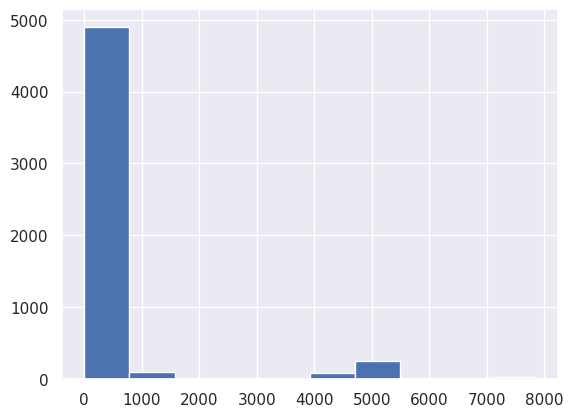

In [127]:
df['host_total_listings_count'].hist()

<Axes: >

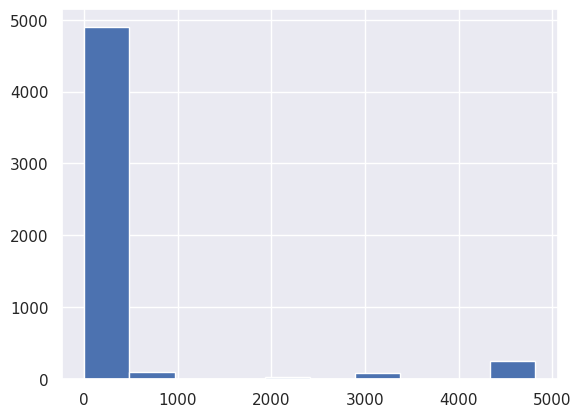

In [128]:
df['host_listings_count'].hist()

Kolumny host_listings_count, host_total_listings_count mają punkty odstające, które mogą mieć negatywny wpływ na wyniki. Trzeba usunąć 5% górnych wartości.

# 8.	Przeprowadzenie czyszczenia danych
Uzupełnienie danych

In [129]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df['review_scores_rating'] = imp.fit_transform(df[['review_scores_rating']])
df['review_scores_accuracy'] = imp.fit_transform(df[['review_scores_accuracy']])
df['review_scores_cleanliness'] = imp.fit_transform(df[['review_scores_cleanliness']])
df['review_scores_checkin'] = imp.fit_transform(df[['review_scores_checkin']])
df['review_scores_communication'] = imp.fit_transform(df[['review_scores_communication']])
df['review_scores_location'] = imp.fit_transform(df[['review_scores_location']])
df['review_scores_value'] = imp.fit_transform(df[['review_scores_value']])
df['review_scores_value'] = imp.fit_transform(df[['review_scores_value']])
df['review_scores_value'] = imp.fit_transform(df[['review_scores_value']])
df['review_scores_value'] = imp.fit_transform(df[['review_scores_value']])

In [130]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='median')
df['host_acceptance_rate'] = imp.fit_transform(df[['host_acceptance_rate']])
df['host_response_rate'] = imp.fit_transform(df[['host_response_rate']])




In [131]:
from feature_engine.imputation import CategoricalImputer
imp3 = CategoricalImputer()
df['host_response_time'] = imp3.fit_transform(df[['host_response_time']])
df['host_neighbourhood'] = imp3.fit_transform(df[['host_neighbourhood']])
df['host_location'] = imp3.fit_transform(df[['host_location']])

Usunięcie punktów odstających  host_listings_count, host_total_listings_count , price

In [132]:
df = df[(df.price <= np.percentile(df.price, 95.0)) & (df.price > 0)]
df = df[(df.host_listings_count <= np.percentile(df.host_listings_count, 95.0)) & (df.host_listings_count > 0)]
df = df[(df.host_total_listings_count <= np.percentile(df.host_total_listings_count, 95.0)) & (df.host_total_listings_count > 0)]

<Axes: >

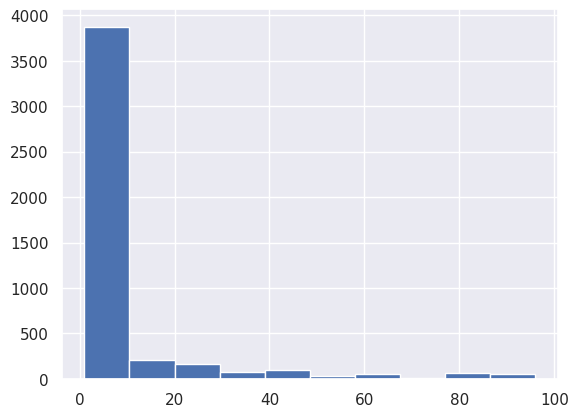

In [133]:
df['host_listings_count'].hist()

# 9.	Zbadanie zależności pomiędzy zmiennymi

In [134]:
pd.options.display.float_format = '{:.5f}'.format
corr = df.select_dtypes(include='number').corr().round(decimals=2)
corr

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
host_response_rate,1.00000,0.22000,0.03000,0.02000,0.03000,-0.01000,0.02000,-0.02000,-0.00000,0.01000,0.12000,0.05000,-0.11000,-0.03000,-0.11000,-0.10000,-0.00000,-0.00000,-0.10000,-0.00000,-0.04000,-0.04000,-0.03000,-0.06000,0.07000,0.12000,0.11000,0.13000,0.10000,0.11000,0.07000,0.09000,0.06000,0.08000,0.03000,0.06000,-0.09000,-0.04000,0.11000
host_acceptance_rate,0.22000,1.00000,0.03000,0.02000,0.03000,0.01000,0.10000,-0.01000,0.05000,0.07000,0.13000,0.02000,-0.20000,-0.06000,-0.21000,-0.20000,0.00000,0.00000,-0.20000,0.00000,-0.01000,-0.00000,-0.00000,-0.08000,0.14000,0.22000,0.19000,0.04000,0.03000,0.04000,0.03000,0.03000,0.03000,0.05000,-0.02000,-0.00000,-0.04000,-0.03000,0.24000
host_listings_count,0.03000,0.03000,1.00000,0.97000,-0.01000,-0.08000,0.01000,0.05000,0.01000,0.02000,-0.17000,0.00000,0.04000,-0.03000,0.05000,0.04000,-0.01000,-0.01000,0.05000,-0.01000,0.03000,0.07000,0.10000,0.12000,-0.11000,-0.07000,-0.05000,-0.07000,-0.08000,-0.06000,-0.06000,-0.08000,-0.06000,-0.12000,0.89000,0.86000,0.17000,0.06000,-0.05000
host_total_listings_count,0.02000,0.02000,0.97000,1.00000,-0.02000,-0.08000,0.01000,0.06000,0.01000,0.02000,-0.18000,0.01000,0.05000,-0.01000,0.06000,0.06000,-0.01000,-0.01000,0.06000,-0.01000,0.04000,0.09000,0.11000,0.14000,-0.10000,-0.07000,-0.06000,-0.11000,-0.11000,-0.09000,-0.10000,-0.12000,-0.08000,-0.15000,0.85000,0.81000,0.19000,0.09000,-0.05000
latitude,0.03000,0.03000,-0.01000,-0.02000,1.00000,0.09000,0.03000,0.01000,0.00000,0.01000,0.01000,0.09000,-0.07000,0.03000,-0.07000,-0.07000,0.01000,0.01000,-0.07000,0.01000,0.02000,0.00000,0.00000,-0.03000,0.07000,0.07000,0.05000,0.05000,0.05000,0.05000,0.04000,0.04000,0.03000,0.04000,0.01000,0.02000,-0.03000,-0.02000,0.08000
longitude,-0.01000,0.01000,-0.08000,-0.08000,0.09000,1.00000,-0.01000,0.04000,0.03000,0.04000,-0.05000,-0.10000,0.03000,0.05000,0.04000,0.03000,-0.00000,-0.00000,0.03000,-0.00000,0.06000,0.05000,0.06000,0.04000,-0.00000,-0.02000,-0.00000,-0.04000,-0.02000,-0.02000,-0.06000,-0.05000,-0.03000,-0.00000,-0.07000,-0.08000,0.04000,0.02000,-0.03000
accommodates,0.02000,0.10000,0.01000,0.01000,0.03000,-0.01000,1.00000,0.57000,0.82000,0.84000,0.21000,0.55000,-0.13000,-0.01000,-0.13000,-0.12000,-0.01000,-0.01000,-0.13000,-0.01000,0.04000,0.02000,0.01000,0.01000,-0.02000,0.03000,0.06000,0.03000,0.01000,0.01000,0.04000,0.02000,-0.03000,0.02000,-0.03000,0.01000,-0.17000,0.06000,0.05000
bathrooms,-0.02000,-0.01000,0.05000,0.06000,0.01000,0.04000,0.57000,1.00000,0.59000,0.55000,0.09000,0.51000,-0.03000,-0.02000,-0.03000,-0.03000,-0.01000,-0.01000,-0.03000,-0.01000,0.02000,-0.01000,-0.02000,0.00000,-0.11000,-0.10000,-0.06000,0.00000,-0.01000,-0.02000,-0.01000,-0.03000,-0.02000,0.00000,0.02000,0.02000,-0.06000,0.13000,-0.11000
bedrooms,-0.00000,0.05000,0.01000,0.01000,0.00000,0.03000,0.82000,0.59000,1.00000,0.76000,0.18000,0.57000,-0.06000,0.01000,-0.06000,-0.05000,-0.01000,-0.01000,-0.06000,-0.01000,-0.00000,-0.03000,-0.04000,-0.01000,-0.08000,-0.06000,-0.02000,0.03000,0.01000,0.01000,0.05000,0.03000,-0.02000,0.03000,-0.06000,0.00000,-0.17000,-0.07000,-0.05000
beds,0.01000,0.07000,0.02000,0.02000,0.01000,0.04000,0.84000,0.55000,0.76000,1.00000,0.17000,0.48000,-

<Axes: >

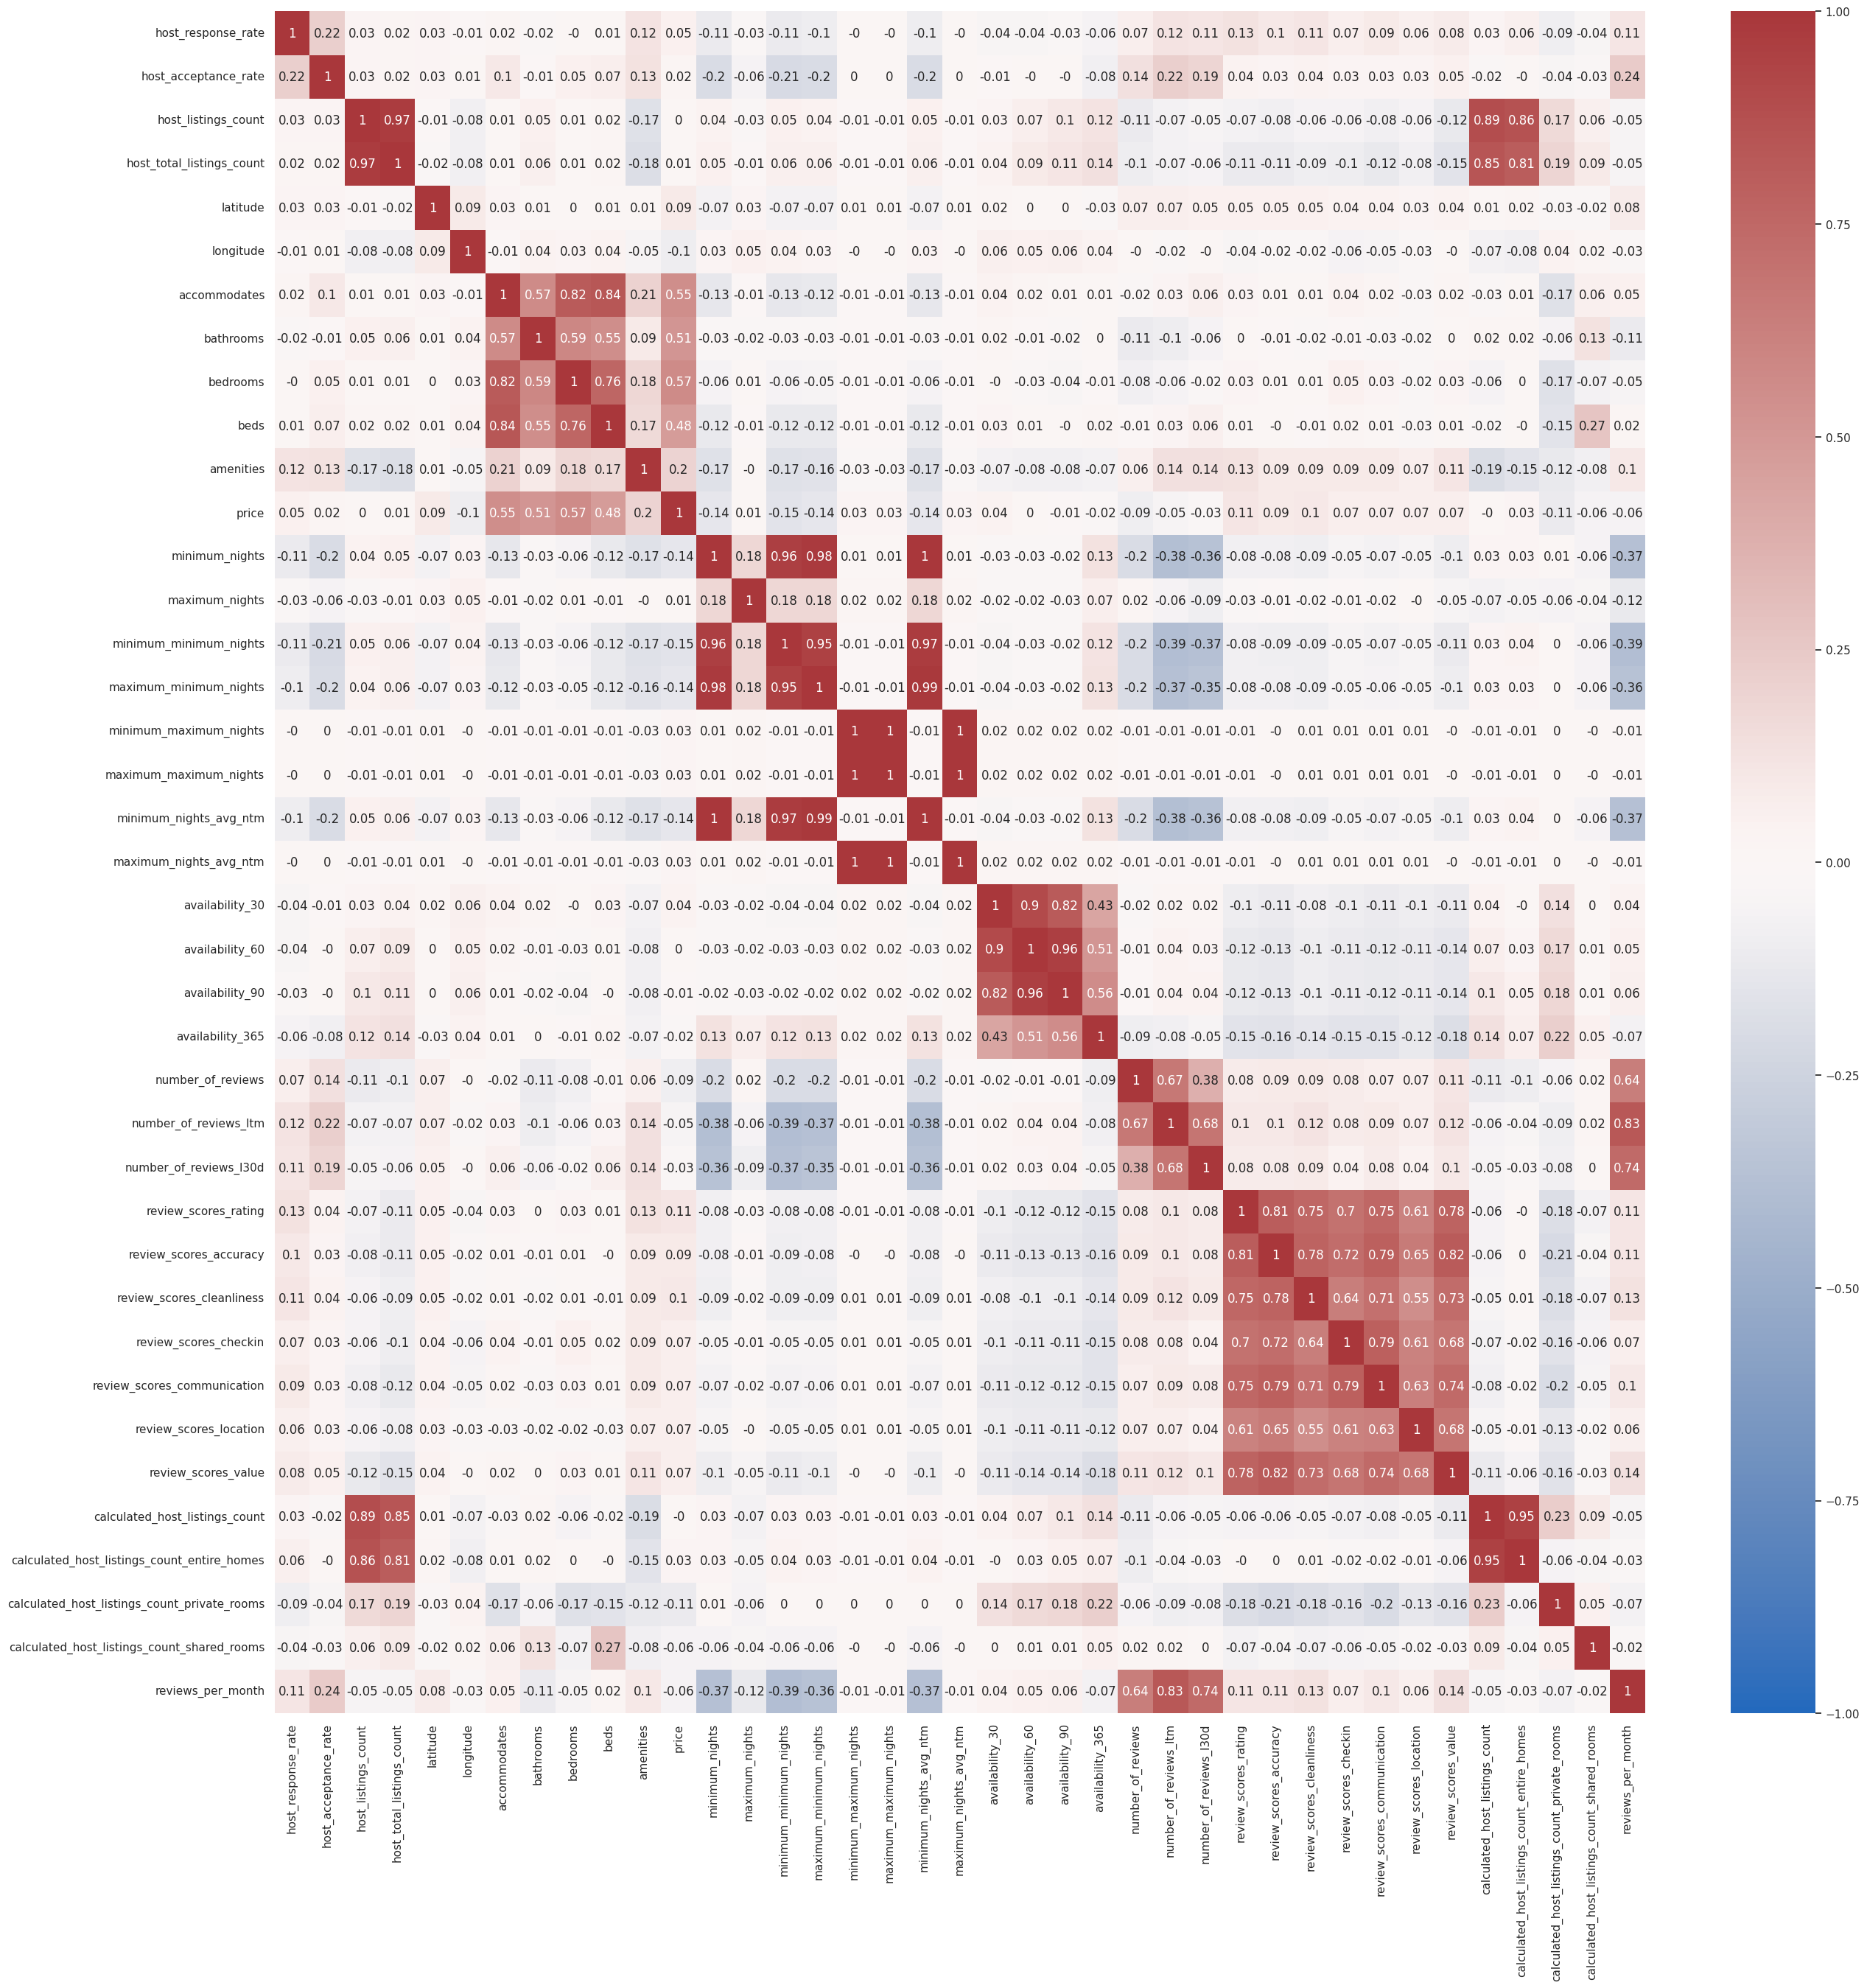

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap='vlag', vmin=-1, vmax=1)

In [136]:
#code from https://www.kaggle.com/code/chrisbss1/cramer-s-v-correlation-matrix
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
  stat = chi2_contingency(crosstab)[0]
  obs = np.sum(crosstab)
  mini = min(crosstab.shape)-1
  return (stat/(obs*mini))

rows= []
for var1 in df:
  col = []
  for var2 in df :
    cramers =cramers_V(df[var1], df[var2])
    col.append(round(cramers,2))
  rows.append(col)
cramers_results = np.array(rows)


<Axes: >

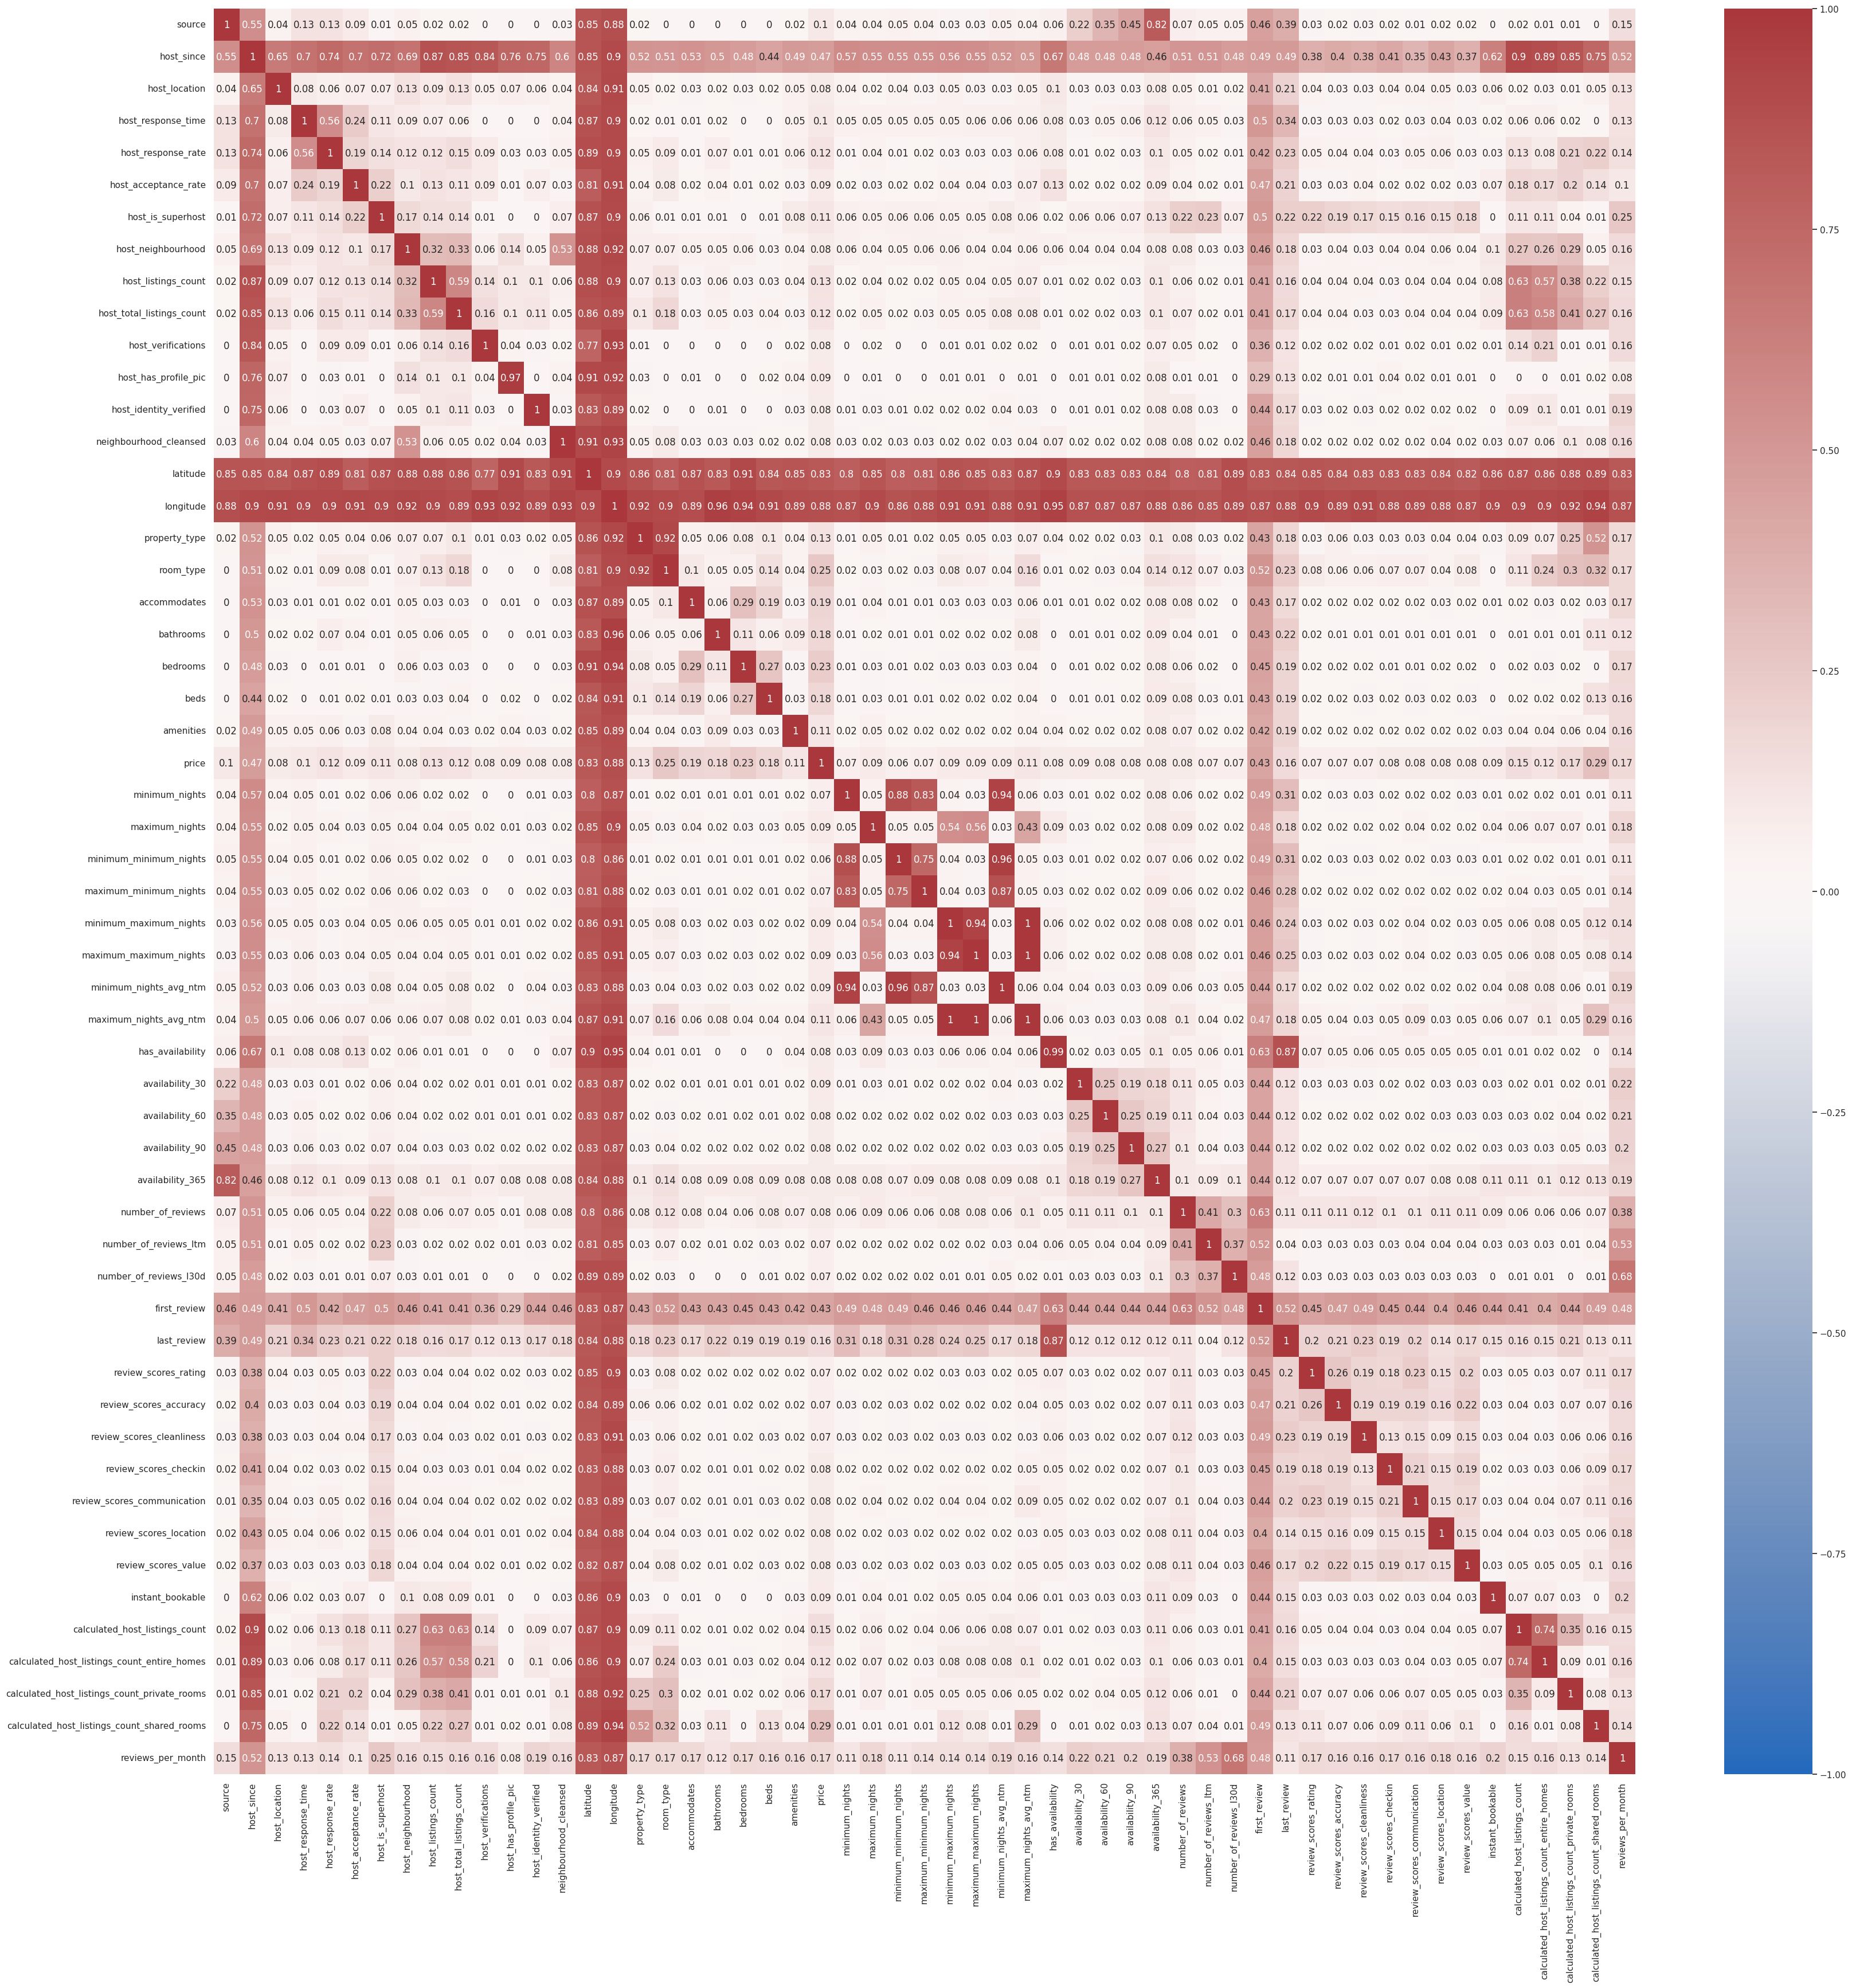

In [137]:
df1 = pd.DataFrame(cramers_results, columns = df.columns, index =df.columns).round(decimals=2)
plt.figure(figsize=(40, 40))
sns.heatmap(df1, annot=True, cmap='vlag', vmin=-1, vmax=1)

# 10. Wyniki
Macierz korelacji skutecznej na istnienie grupy, które mają duże podobieństwo. Liczba nocy, dostępność, ocena oraz liczba mieszkań do wynajmu i jednego wynajmującego.
Cramer wskazuje szczególną wartość geolokacji oraz czasu pierwszego wynajmu mieszkania (host_since, first_review są podobnymi wartościami)